# Omni Camera

![](pics/lense.jpg)

A catadioptric sensor is a camera made up of a mirror (catoptrics) and lenses (dioptrics). By simplifying things a lot, one can think of a catadioptric sensor as consisting of a normal camera viewing the world reflected in a parabolic-shaped mirror. To be useful, the mirror must be perfectly aligned with and placed at a precise distace from the camera. The main advantage of a catadioptric sensor is its panoramic view of the world, being able to view a full hemisphere (360 degrees by 90 degrees. 

In [1]:
%matplotlib inline

In [11]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
# from opencvutils.video import Camera
# import opencvutils as cvu
# from opencvutils.jupyter import imshow
import numpy as np
import cv2
import time

# Dewarping

![](pics/math.jpg)

In [12]:
class Dewarper:
    def __init__(self, Ws, Hs, Rmax, Rmin, Cx, Cy, interpolation=cv2.INTER_CUBIC):
        self.interpolation = interpolation

        # determine the destination image size
        Wd = int(2.0*(float(Rmax+Rmin)/2.0)*np.pi)
        Hd = Rmax-Rmin

        print('Unwrapped image size:',Wd,Hd)

        self.buildLUT(Wd, Hd, Rmax, Rmin, Cx, Cy)

    """ 
    Creates a polar map look up table (LUT)
    in:
        Wd - width destination
        Hd - height destination
        Ws - width src
        Hs - height src
        Rmin - inner ring of image
        Rmax - outer ring of image
        Cx - camera center x
        Cy - camera center y
    out: mapping matrix
    """
    def buildLUT(self, Wd, Hd, Rmax, Rmin, Cx, Cy):
        map_x = np.zeros((Hd, Wd), np.float32)
        map_y = np.zeros((Hd, Wd), np.float32)

        # polar to Cartesian
        # x = r*cos(t)
        # y = r*sin(t)
        for i in range(0,int(Hd)):
            for j in range(0,int(Wd)):
                theta = -float(j)/float(Wd)*2.0*np.pi
                rho = float(Rmin + i)
                map_x.itemset((i,j), Cx + rho*np.cos(theta))
                map_y.itemset((i,j), Cy + rho*np.sin(theta))

        (self.map1, self.map2) = cv2.convertMaps(map_x, map_y, cv2.CV_16SC2)


    """
    Takes the original image and unwarps it, note the new image is much smaller
    in: raw image needing to be unwarped
    out: panoramic image
    """
    def unwarp(self, img):
        output = cv2.remap(img, self.map1, self.map2, self.interpolation)
        return output


In [45]:
def process(file, rmin):
    # read in the image grayscale
    frame = cv2.imread(file,0)
    h,w = frame.shape
    print('Image size:',w,h)

    # These are done by hand ... had trouble automating it reliably
    cx = int(w/2)
    cy = int(h/2)
    rmax = cy - rmin

    print('Parameters: center(x,y) %d,%d radius(max,min) %d,%d'%(cx,cy,rmax,rmin))

    dewarp = Dewarper(w,h,rmax,rmin,cx,cy)
    im = dewarp.unwarp(frame)
    
    return im

In [46]:
im = process('pics/football_donut.jpg', 150)

Image size: 1414 1402
Parameters: center(x,y) 707,701 radius(max,min) 551,150
Unwrapped image size: 2202 401


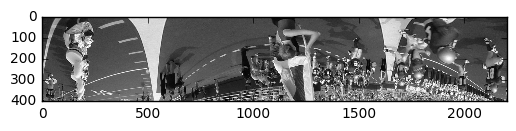

In [47]:
plt.imshow(im, cmap='gray');

In [48]:
im = process('pics/in.jpg',10)

Image size: 640 480
Parameters: center(x,y) 320,240 radius(max,min) 230,10
Unwrapped image size: 753 220


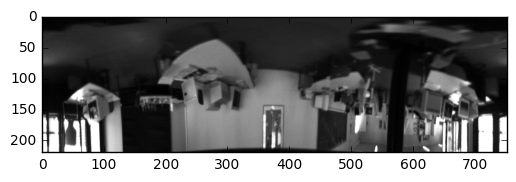

In [49]:
plt.imshow(im, cmap='gray');

In [50]:
im = process('pics/image2.png',30)

Image size: 329 329
Parameters: center(x,y) 164,164 radius(max,min) 134,30
Unwrapped image size: 515 104


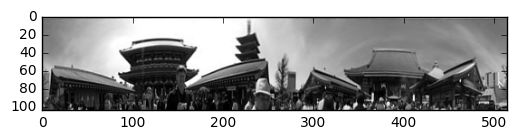

In [51]:
plt.imshow(im, cmap='gray');

# References

- [Katherine Scott](http://www.kscottz.com/dewarped-panoramic-images-from-a-raspberrypi-camera-module/)
- [Mark Borg](https://mark-borg.github.io/projects/omniapp)
- [wikipedia](https://en.wikipedia.org/wiki/Omnidirectional_camera)


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.